In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
file_list = os.listdir(".")
csv_files = [file for file in file_list if file.endswith('.csv')]
df = pd.DataFrame()
for csv_file in csv_files:
    data = pd.read_csv(os.path.join(".", csv_file))
    data['started_at'] = pd.to_datetime(data['started_at'])
    data['ended_at'] = pd.to_datetime(data['ended_at'])
    data['year_month'] = data['started_at'].dt.strftime('%Y-%m')
    data['year'] = data['started_at'].dt.year
    data['month'] = data['started_at'].dt.month
    data['ride_length_sec'] = (data['ended_at'] - data['started_at']).apply(lambda x: x.seconds)
    data['day_of_week'] = data['started_at'].dt.day_name()
    df = pd.concat([df, data], ignore_index=True)

In [3]:
df = df.drop(columns=[
    'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 
    'start_lat', 'start_lng', 'end_lat', 'end_lng', 'started_at', 'ended_at']
    )
df.isna().sum()

ride_id            0
rideable_type      0
member_casual      0
year_month         0
year               0
month              0
ride_length_sec    0
day_of_week        0
dtype: int64

In [4]:
df.head()

,ride_id,rideable_type,member_casual,year_month,year,month,ride_length_sec,day_of_week
0,550CF7EFEAE0C618,electric_bike,casual,2022-08,2022,8,451,Sunday
1,DAD198F405F9C5F5,electric_bike,casual,2022-08,2022,8,842,Monday
2,E6F2BC47B65CB7FD,electric_bike,casual,2022-08,2022,8,644,Monday
3,F597830181C2E13C,electric_bike,casual,2022-08,2022,8,903,Monday
4,0CE689BB4E313E8D,electric_bike,casual,2022-08,2022,8,352,Sunday


In [5]:
summary = (
    df.groupby(['day_of_week', 'member_casual']).agg({'ride_id': 'count', 'ride_length_sec': 'mean'})
    .reset_index()
    .rename(columns={'ride_id': 'count', 'ride_length_sec': 'mean_ride_length'})
    )
summary

,day_of_week,member_casual,count,mean_ride_length
0,Friday,casual,335129,1228.517654
1,Friday,member,516742,719.471493
2,Monday,casual,257954,1241.493010
3,Monday,member,501472,692.457730
4,Saturday,casual,435299,1430.377437
5,Saturday,member,461546,807.506281
6,Sunday,casual,332621,1457.369387
7,Sunday,member,386524,801.396909
8,Thursday,casual,289251,1113.160722
9,Thursday,member,569888,697.308894


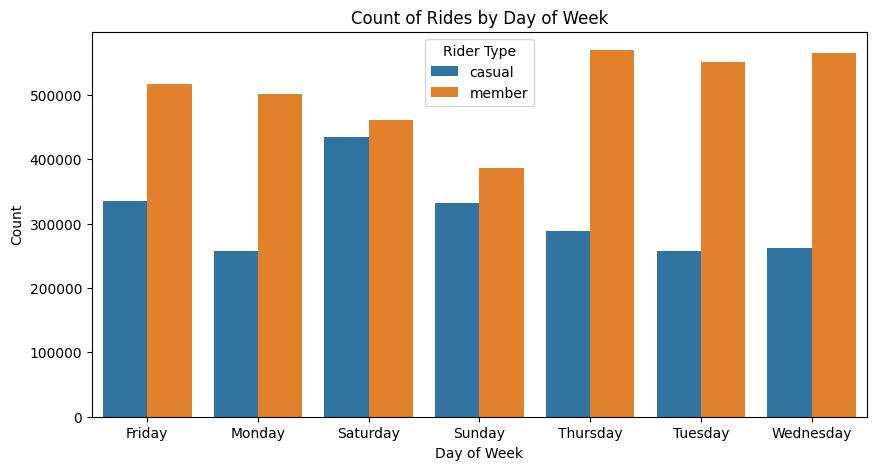

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(x='day_of_week', y='count', hue='member_casual', data=summary)
plt.title('Count of Rides by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Rider Type')
plt.show()

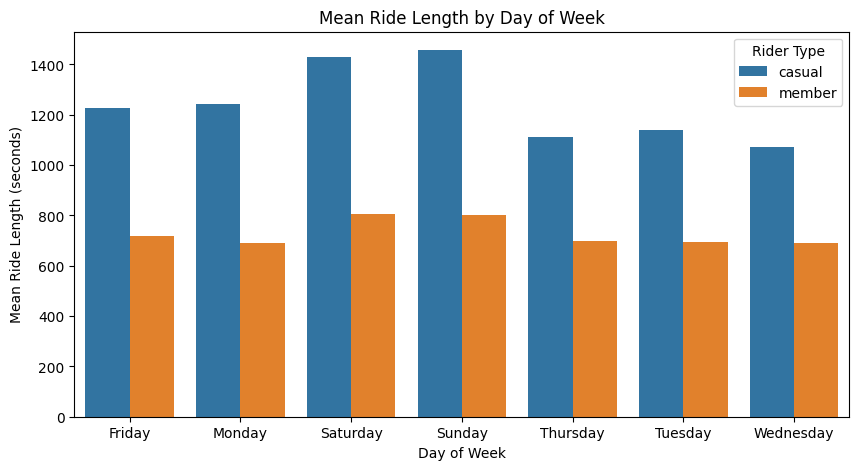

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(x='day_of_week', y='mean_ride_length', hue='member_casual', data=summary)
plt.title('Mean Ride Length by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Mean Ride Length (seconds)')
plt.legend(title='Rider Type')
plt.show()

In [8]:
summary2 = (
    df.groupby(['year_month', 'member_casual']).agg({'ride_id': 'count', 'ride_length_sec': 'mean'}).reset_index()
    .rename(columns={'ride_id': 'count', 'ride_length_sec': 'mean_ride_length'})
    )
summary2

,year_month,member_casual,count,mean_ride_length
0,2022-08,casual,358924,1325.789267
1,2022-08,member,427008,786.660421
2,2022-09,casual,296697,1235.894327
3,2022-09,member,404642,759.286065
4,2022-10,casual,208989,1138.820306
5,2022-10,member,349696,693.524321
6,2022-11,casual,100772,984.807189
7,2022-11,member,236963,657.508126
8,2022-12,casual,44894,840.844255
9,2022-12,member,136912,620.761650


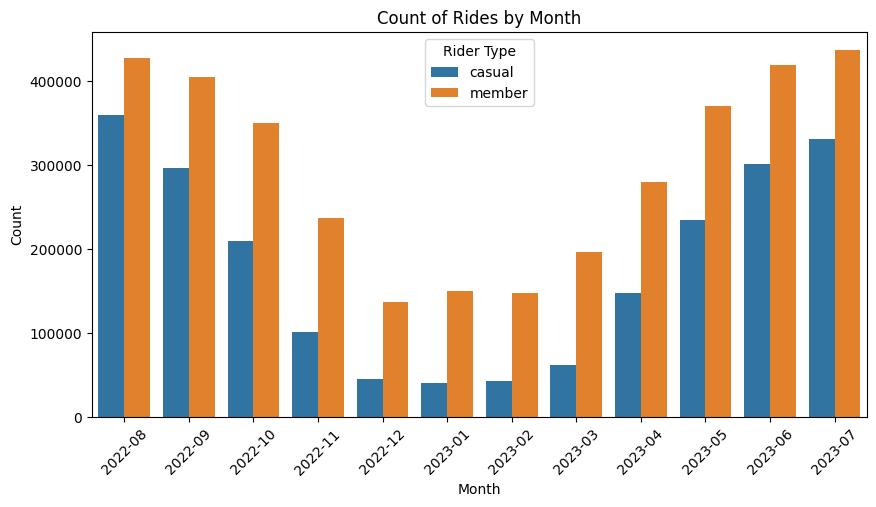

In [9]:
plt.figure(figsize=(10, 5))
sns.barplot(x='year_month', y='count', hue='member_casual', data=summary2)
plt.title('Count of Rides by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Rider Type')
plt.xticks(rotation=45)
plt.show()

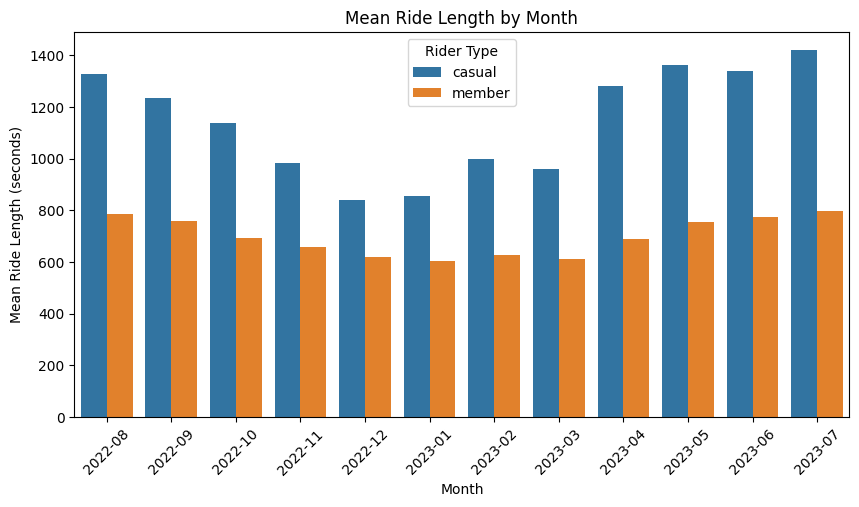

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x='year_month', y='mean_ride_length', hue='member_casual', data=summary2)
plt.title('Mean Ride Length by Month')
plt.xlabel('Month')
plt.ylabel('Mean Ride Length (seconds)')
plt.legend(title='Rider Type')
plt.xticks(rotation=45)
plt.show()